In [1]:
import logging

import graphcat.notebook

logging.basicConfig(level=logging.INFO)

INFO:graphcat:Task c executing. Inputs: {}
INFO:graphcat:Task c finished. Output: None


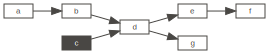

In [2]:
graph = graphcat.StaticGraph()
logger = graphcat.Logger(graph)

graph.add_task("a")
graph.add_task("b", graphcat.raise_exception(RuntimeError("whoops!")))
graph.add_task("c")
graph.add_task("d")
graph.add_task("e")
graph.add_task("f")
graph.add_task("g")

graph.set_links("a", "b")
graph.set_links("b", "d")
graph.set_links("c", "d")
graph.set_links("d", ["e", "g"])
graph.set_links("e", "f")

graph.update("c")

graphcat.notebook.display(graph)

INFO:graphcat:Task a executing. Inputs: {}
INFO:graphcat:Task a finished. Output: None
INFO:graphcat:Task b executing. Inputs: {None: [None]}
ERROR:graphcat:Task b failed. Exception: whoops!


Exception: RuntimeError('whoops!')


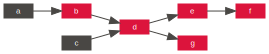

In [3]:
try:
    graph.update("f")
except Exception as e:
    print(f"Exception: {e!r}")
graphcat.notebook.display(graph)

INFO:graphcat:Task b executing. Inputs: {None: [None]}
ERROR:graphcat:Task b failed. Exception: whoops!


Exception: RuntimeError('whoops!')


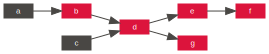

In [4]:
try:
    graph.output("g")
except Exception as e:
    print(f"Exception: {e!r}")
graphcat.notebook.display(graph)

INFO:graphcat:Task b executing. Inputs: {None: [None]}
INFO:graphcat:Task b finished. Output: None
INFO:graphcat:Task d executing. Inputs: {None: [None, None]}
INFO:graphcat:Task d finished. Output: None
INFO:graphcat:Task g executing. Inputs: {None: [None]}
INFO:graphcat:Task g finished. Output: None


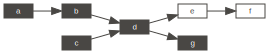

In [5]:
graph.set_task("b", graphcat.null)
graph.update("g")
graphcat.notebook.display(graph)